<a href="https://colab.research.google.com/github/LizcanoJuan1010/Machine-Learning-Projects/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto 2
##Tecnicas de aprendizaje de  maquina
###Grupo 1
* Juan Lizcano
* David Santiago
* Maria Del Corral


#Parte 1: analisis exploratorio de datos

In [ ]:
!pip install ydata-profiling

In [ ]:
!pip install dash

In [ ]:
from ydata_profiling import ProfileReport

Importamos las librerías necesarias.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se carga el data set.

In [ ]:
df=pd.read_csv("dataset_proyecto_2.csv")

Visualizamos los primeros datos.

In [ ]:
df.head()

,edad,ingresos_anuales,cantidad_compras,valor_promedio_compra,frecuencia_compras_mensual,dispositivo_utilizado,fuente_trafico,dias_desde_ultima_compra,valor_total_gastado,satisfaccion_cliente,metodo_pago,participacion_programa_lealtad,productos_adquiridos
0,28,90455,4,135,0.921436,tablet,redes sociales,230,3369,2.929789,tarjeta crédito,0,computadoras
1,35,55842,19,367,5.321630,móvil,búsqueda orgánica,17,8276,3.446550,tarjeta crédito,1,accesorios
2,30,23268,39,257,9.021315,móvil,búsqueda orgánica,13,2216,4.034947,tarjeta crédito,0,accesorios
3,35,60841,8,862,2.865878,móvil,búsqueda orgánica,72,8003,3.466717,paypal,0,electrodomésticos
4,25,100485,19,444,7.365862,móvil,redes sociales,57,8550,4.310355,paypal,1,móviles


Transformamos a listas.

In [ ]:
df.columns.tolist()

['edad',
 'ingresos_anuales',
 'cantidad_compras',
 'valor_promedio_compra',
 'frecuencia_compras_mensual',
 'dispositivo_utilizado',
 'fuente_trafico',
 'dias_desde_ultima_compra',
 'valor_total_gastado',
 'satisfaccion_cliente',
 'metodo_pago',
 'participacion_programa_lealtad',
 'productos_adquiridos']

Usamos el comando `describe` para obtener más información de los datos.

In [ ]:
df.describe()

,edad,ingresos_anuales,cantidad_compras,valor_promedio_compra,frecuencia_compras_mensual,dias_desde_ultima_compra,valor_total_gastado,satisfaccion_cliente,participacion_programa_lealtad
count,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06,1.833331e+06
mean,3.877552e+01,7.614756e+04,1.408932e+01,4.301820e+02,5.487638e+00,9.651723e+01,7.045614e+03,3.761349e+00,4.636860e-01
std,1.358327e+01,4.419407e+04,1.182157e+01,3.086627e+02,4.209958e+00,1.065618e+02,6.204356e+03,7.281546e-01,4.986797e-01
min,1.800000e+01,1.000000e+04,1.000000e+00,5.000000e+01,2.000125e-01,1.000000e+00,1.000000e+03,2.000002e+00,0.000000e+00
25%,2.900000e+01,4.131500e+04,4.000000e+00,1.960000e+02,1.235148e+00,1.200000e+01,2.944000e+03,3.220253e+00,0.000000e+00
50%,3.500000e+01,6.750700e+04,9.000000e+00,3.610000e+02,5.749663e+00,4.500000e+01,4.606000e+03,3.823675e+00,0.000000e+00
75%,4.700000e+01,1.078480e+05,2.100000e+01,5.400000e+02,9.280341e+00,1.640000e+02,8.770000e+03,4.348068e+00,1.000000e+00
max,6.900000e+01,1.999990e+05,4.900000e+01,1.499000e+03,1.499999e+01,3.640000e+02,2.999900e+04,5.000000e+00,1.000000e+00


Vemos con qué tipo de datos estamos trabajando.

In [ ]:
def check_df(df: object, head: object = 5) -> object:
    print("\nShape")
    print(df.shape)
    print("\nTypes")
    print(df.dtypes)
    print("\nNANs")
    print(df.isnull().sum())
    print("\nInfo")
    print(df.info())
check_df(df)


Shape
(1833331, 13)

Types
edad                                int64
ingresos_anuales                    int64
cantidad_compras                    int64
valor_promedio_compra               int64
frecuencia_compras_mensual        float64
dispositivo_utilizado              object
fuente_trafico                     object
dias_desde_ultima_compra            int64
valor_total_gastado                 int64
satisfaccion_cliente              float64
metodo_pago                        object
participacion_programa_lealtad      int64
productos_adquiridos               object
dtype: object

NANs
edad                              0
ingresos_anuales                  0
cantidad_compras                  0
valor_promedio_compra             0
frecuencia_compras_mensual        0
dispositivo_utilizado             0
fuente_trafico                    0
dias_desde_ultima_compra          0
valor_total_gastado               0
satisfaccion_cliente              0
metodo_pago                       0
participac

Vemos los datos que son categóricos.

In [ ]:
df[['dispositivo_utilizado','fuente_trafico','metodo_pago','productos_adquiridos']]

,dispositivo_utilizado,fuente_trafico,metodo_pago,productos_adquiridos
0,tablet,redes sociales,tarjeta crédito,computadoras
1,móvil,búsqueda orgánica,tarjeta crédito,accesorios
2,móvil,búsqueda orgánica,tarjeta crédito,accesorios
3,móvil,búsqueda orgánica,paypal,electrodomésticos
4,móvil,redes sociales,paypal,móviles
...,...,...,...,...
1833326,PC,búsqueda orgánica,tarjeta crédito,móviles
1833327,PC,redes sociales,paypal,electrodomésticos
1833328,móvil,redes sociales,tarjeta crédito,accesorios
1833329,móvil,búsqueda orgánica,transferencia,computadoras


Vemos sus respectivos posibles valores y la cantidad de estos en el DataFrame.

In [ ]:
df[['dispositivo_utilizado']].value_counts()

,count
dispositivo_utilizado,
móvil,816668
PC,749773
tablet,266890


In [ ]:
df[['fuente_trafico']].value_counts()

,count
fuente_trafico,
redes sociales,832466
búsqueda orgánica,692714
email,308151


In [ ]:
df[['metodo_pago']].value_counts()

,count
metodo_pago,
tarjeta crédito,923892
paypal,517216
transferencia,392223


In [ ]:
df[['productos_adquiridos']].value_counts()

,count
productos_adquiridos,
accesorios,550132
computadoras,444056
móviles,427799
electrodomésticos,411344


Vemos cuantos datos unicos hay en cada variable

In [ ]:
df.apply(lambda x: len(x.unique()))

,0
edad,52
ingresos_anuales,183803
cantidad_compras,49
valor_promedio_compra,1450
frecuencia_compras_mensual,1833331
dispositivo_utilizado,3
fuente_trafico,3
dias_desde_ultima_compra,364
valor_total_gastado,29000
satisfaccion_cliente,1833331


Después de haber previsualizado rápidamente nuestros datos, fue claro que nuestro dataset estaba limpio, ya que no había valores nulos y no parecían haber valores mal digitados dentro de los datos.

Realizamos un reporte general interactivo de los datos en el DataFrame.

In [ ]:
ProfileReport(df, title='Reporte de clientes', minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True,notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#583101'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

100%|██████████| 13/13 [00:31<00:00,  2.40s/it]


El conjunto de datos consta de 13 variables y 1,833,331 registros. De estas, 9 variables son numéricas y 4 son categóricas. Debido a la presencia de variables categóricas, se decidió crear variables dummy para su incorporación en la etapa de modelado.

Además, se identificaron variables con una alta dispersión y una distribución con cola a la derecha. Esto sugiere la existencia de valores atípicamente altos con baja frecuencia en variables como ingresos anuales, cantidad de compras, valor promedio de compras, frecuencia de compras y días desde la última compra.

Asi mismo, el análisis de la frecuencia de compra revela la existencia de dos grupos de clientes: uno con una frecuencia de compra significativamente menor en comparación con el otro.

Las redes sociales parecen ser el principal factor que impulsa las compras, aunque esta tendencia podría estar fuertemente correlacionada con los grupos de edad. Es probable que los clientes de mayor edad recurran con más frecuencia a la búsqueda orgánica. Por otro lado, la lealtad del 46% de los clientes podría ser un factor influyente en sus patrones de compra.

Realizamos la matriz de correlación.

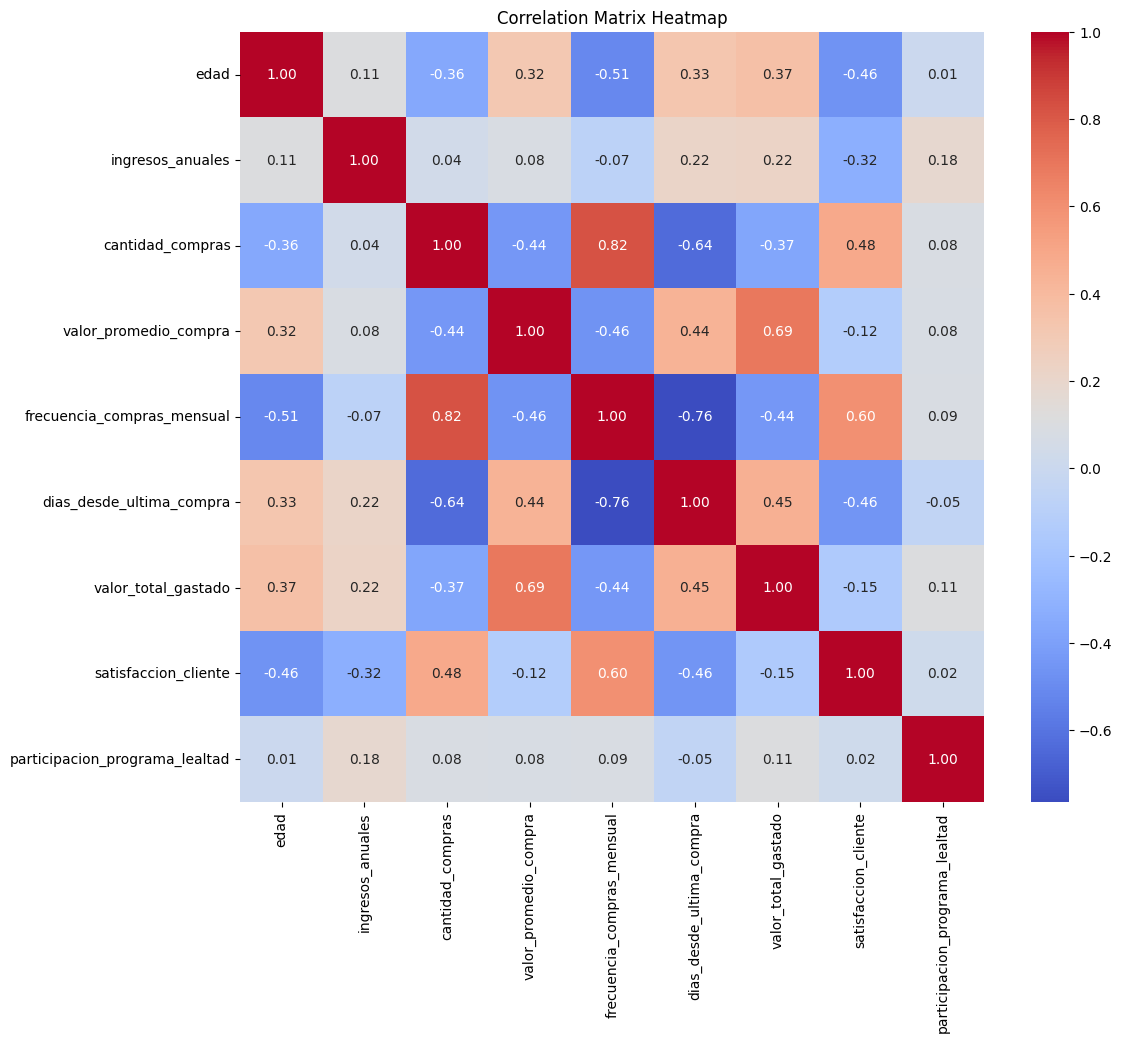

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

También visualizamos el mapa de calor triangular.

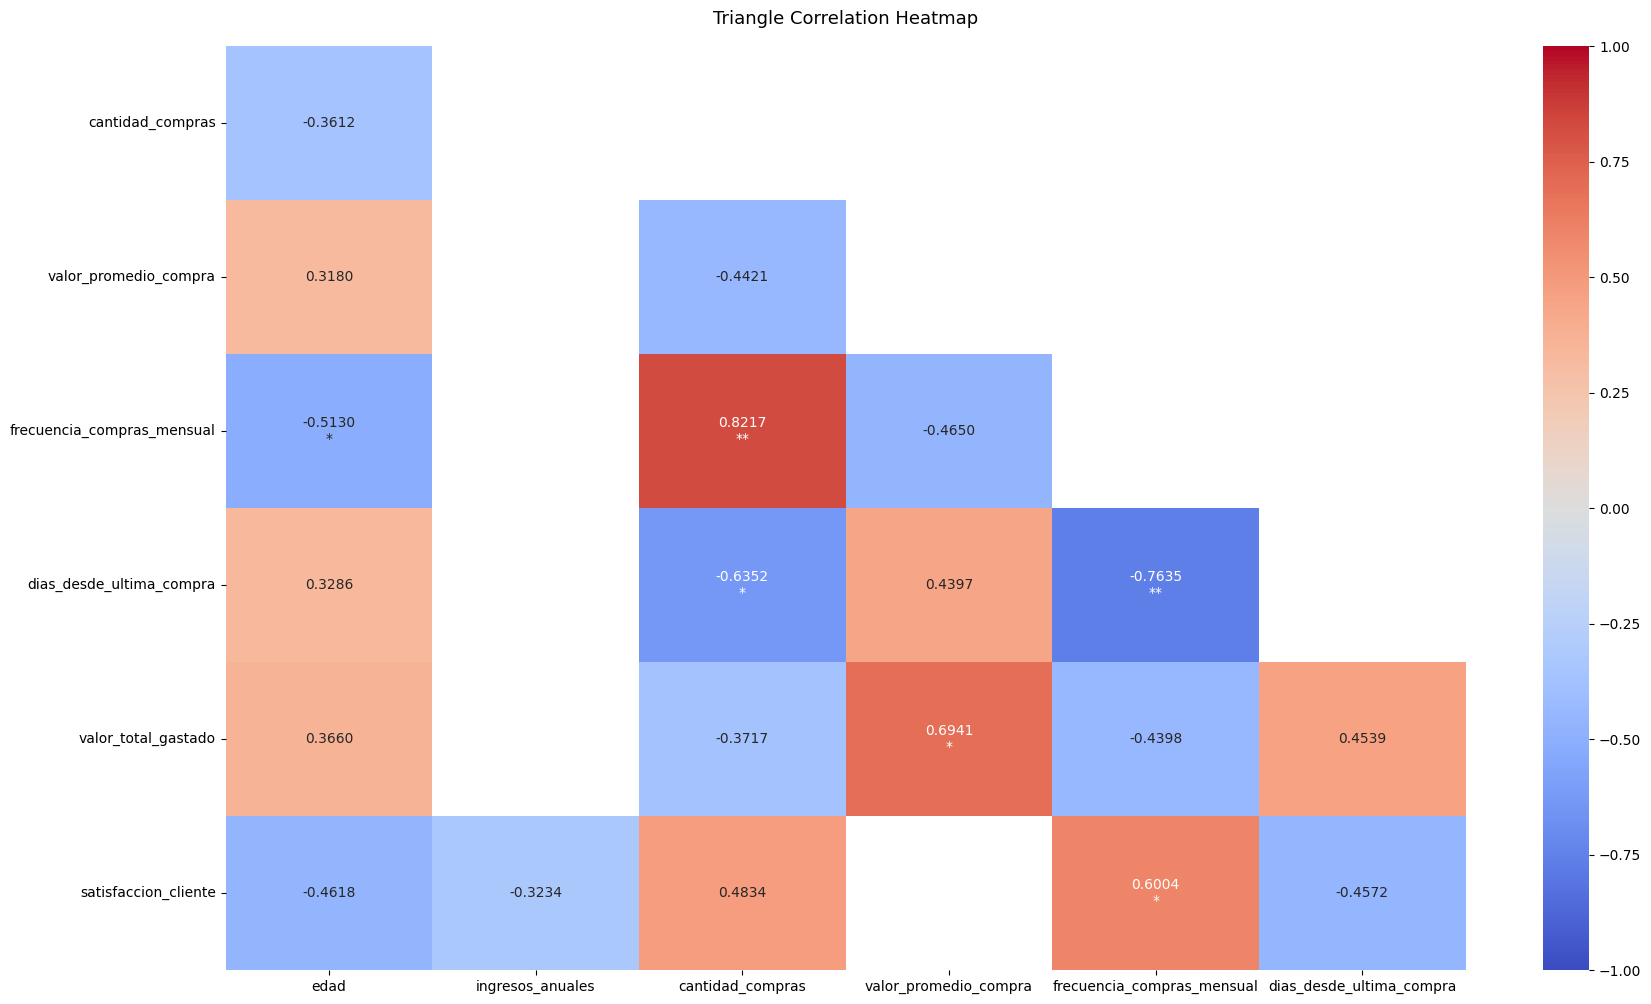

In [ ]:
corr = numeric_df.corr()
f, ax = plt.subplots(figsize=(20, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
cut_off = 0.25
extreme_1 = 0.5
extreme_2 = 0.75
extreme_3 = 0.9
mask |= np.abs(corr) < cut_off
corr = corr[~mask]
remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n*')
          + ('' if abs(val) < extreme_2 else '*')
          + ('' if abs(val) < extreme_3 else '*')
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 13}, pad=16)
plt.show()

Gracias a la matriz y triangulo decorrelación, se puede observar una fuerte relación entre la frecuencia de compras, la cantidad de compras y la satisfacción del cliente. Además, se puede deducir que los clientes jóvenes son más activos y están más satisfechos. También, se puede concluir que el valor total gastado depende más del promedio de compra que de los ingresos, y que el programa de lealtad, al mostrar correlaciones nulas, indica un bajo impacto en el comportamiento de compra de los clientes.

In [ ]:
numeric_df.columns.tolist()

['edad',
 'ingresos_anuales',
 'cantidad_compras',
 'valor_promedio_compra',
 'frecuencia_compras_mensual',
 'dias_desde_ultima_compra',
 'valor_total_gastado',
 'satisfaccion_cliente',
 'participacion_programa_lealtad']

Visualizamos la distribución de las variables numéricas.

<ipython-input-22-c88be89b84b5>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(df[col] ,kde=True)
<ipython-input-22-c88be89b84b5>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(df[col] ,kde=True)
<ipython-input-22-c88be89b84b5>:14: UserWarning: 

`distplot` is a deprecated function

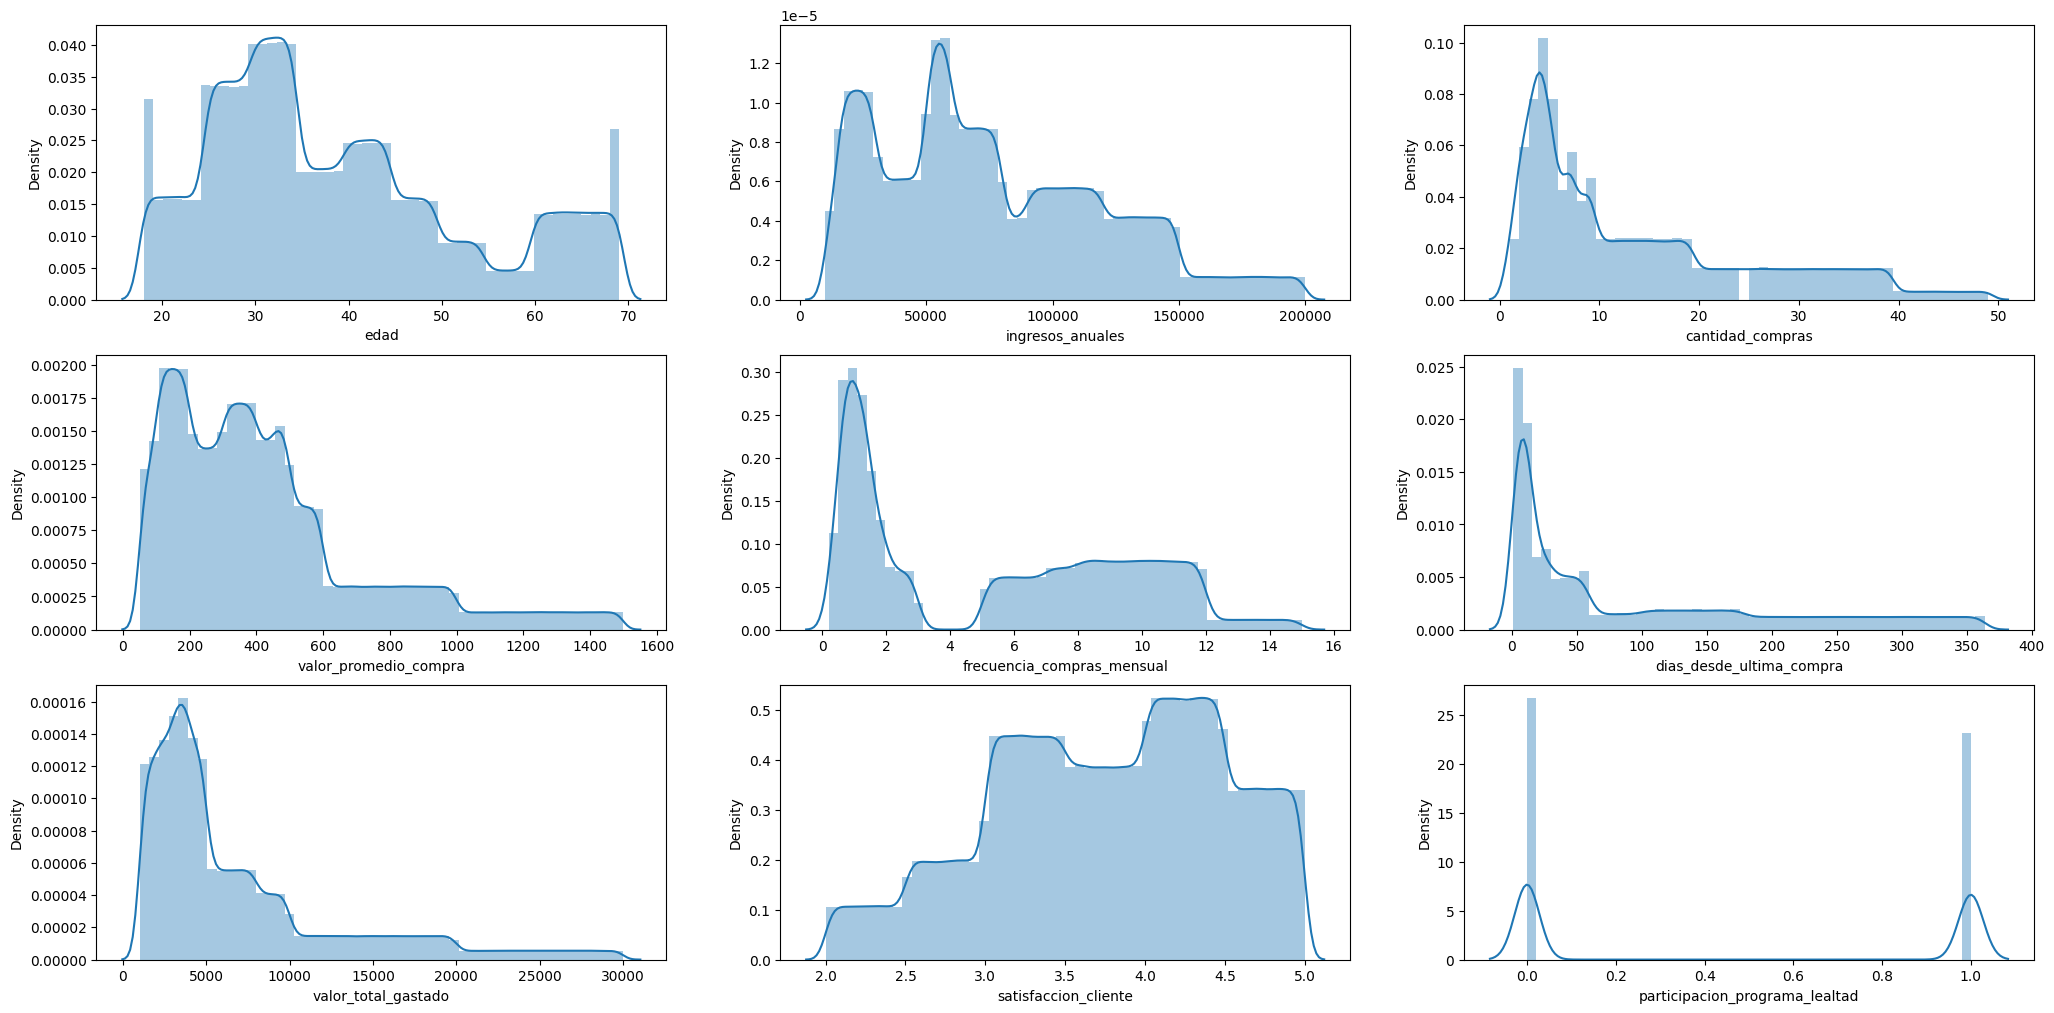

In [ ]:
df_columns = ['edad',
 'ingresos_anuales',
 'cantidad_compras',
 'valor_promedio_compra',
 'frecuencia_compras_mensual',
 'dias_desde_ultima_compra',
 'valor_total_gastado',
 'satisfaccion_cliente',
 'participacion_programa_lealtad']
fig=plt.figure(figsize=(25,25))
for i,col in enumerate(df_columns):
    ax=fig.add_subplot(6,3,i+1)
    if pd.api.types.is_numeric_dtype(df[col]):
     ax1=sns.distplot(df[col] ,kde=True)

Anlizando la distribucion de los datos se puede ver que la mayoria tiende a tener ditribuciones con cola a la derecha lo que aprueba la teoria de que hay una gran espaciemiento en los diferentes campos  aun que con menor frecuencia, valores que se destacan por oponerse a esta recla sobre los datos son la distribucion de la satisfaccion que se puede ver al reves dondes de hay menos frecuencia en niveles bajos de satisfaccion o la lealtad que muestra ser binomial si 1 o no 0

Realizamos un diagrama de caja para visualizar los datos atípicos.


edad Statistics:
count: 1833331.00, mean: 38.78, std: 13.58, min: 18.00, 25%: 29.00, 50%: 35.00, 75%: 47.00, max: 69.00


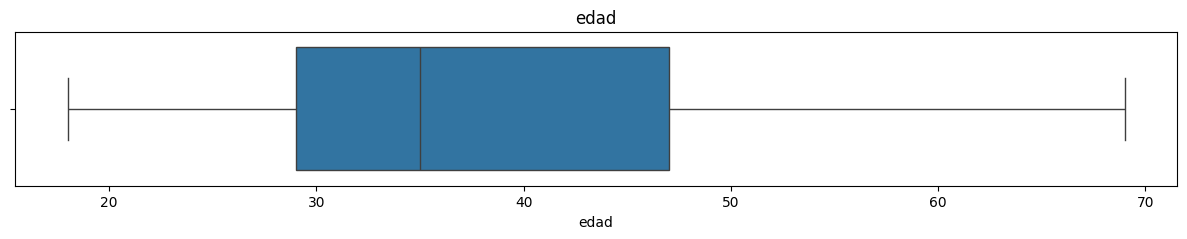


ingresos_anuales Statistics:
count: 1833331.00, mean: 76147.56, std: 44194.07, min: 10000.00, 25%: 41315.00, 50%: 67507.00, 75%: 107848.00, max: 199999.00


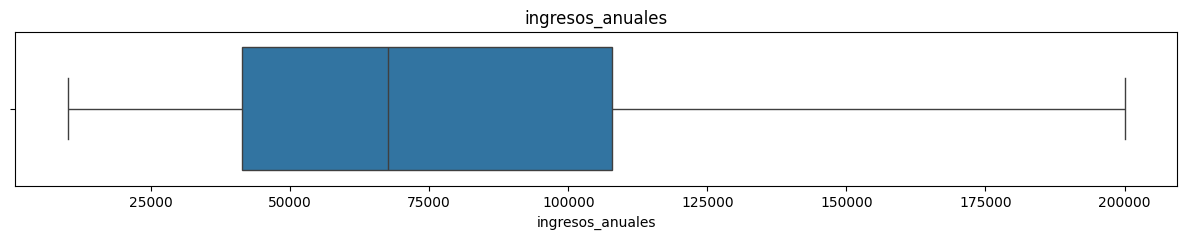


cantidad_compras Statistics:
count: 1833331.00, mean: 14.09, std: 11.82, min: 1.00, 25%: 4.00, 50%: 9.00, 75%: 21.00, max: 49.00


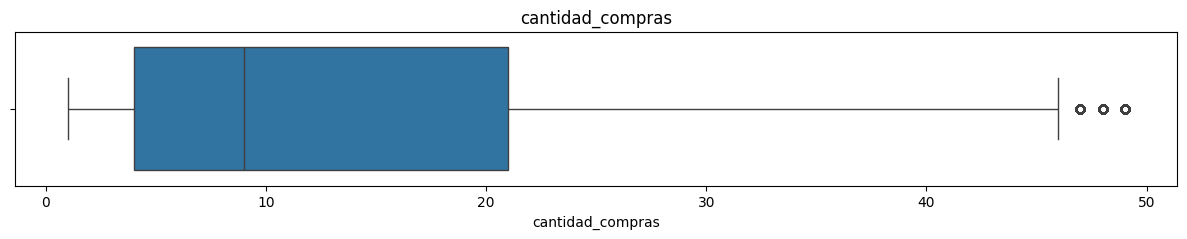


valor_promedio_compra Statistics:
count: 1833331.00, mean: 430.18, std: 308.66, min: 50.00, 25%: 196.00, 50%: 361.00, 75%: 540.00, max: 1499.00


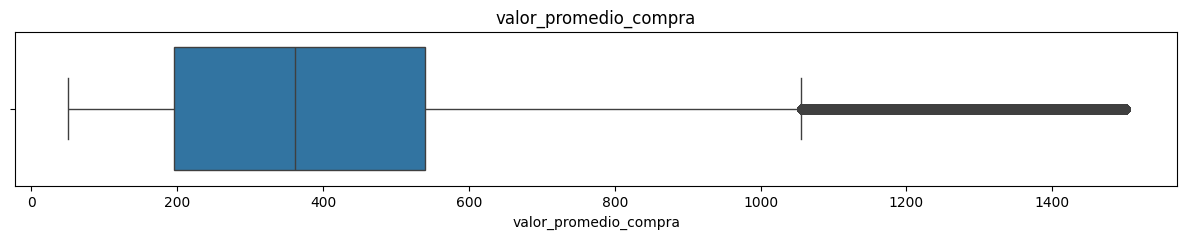


frecuencia_compras_mensual Statistics:
count: 1833331.00, mean: 5.49, std: 4.21, min: 0.20, 25%: 1.24, 50%: 5.75, 75%: 9.28, max: 15.00


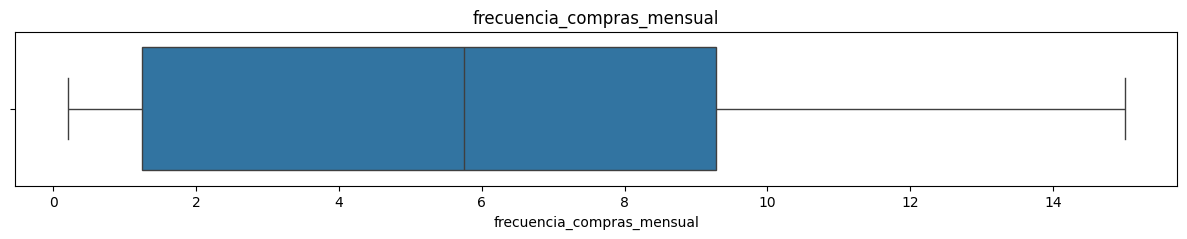


dias_desde_ultima_compra Statistics:
count: 1833331.00, mean: 96.52, std: 106.56, min: 1.00, 25%: 12.00, 50%: 45.00, 75%: 164.00, max: 364.00


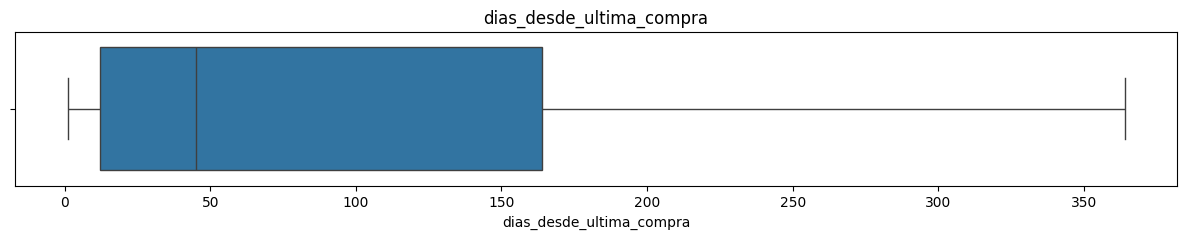


valor_total_gastado Statistics:
count: 1833331.00, mean: 7045.61, std: 6204.36, min: 1000.00, 25%: 2944.00, 50%: 4606.00, 75%: 8770.00, max: 29999.00


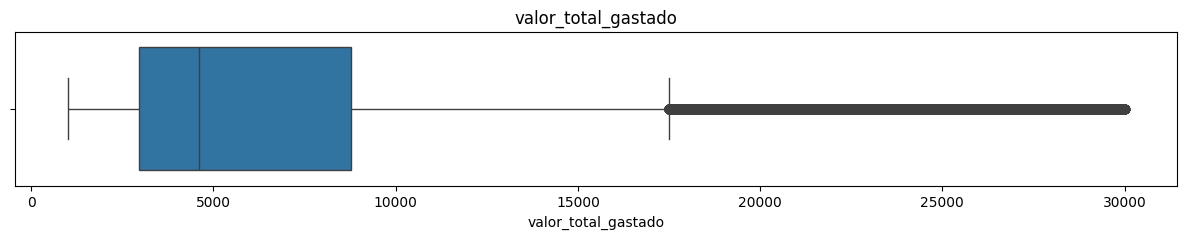


satisfaccion_cliente Statistics:
count: 1833331.00, mean: 3.76, std: 0.73, min: 2.00, 25%: 3.22, 50%: 3.82, 75%: 4.35, max: 5.00


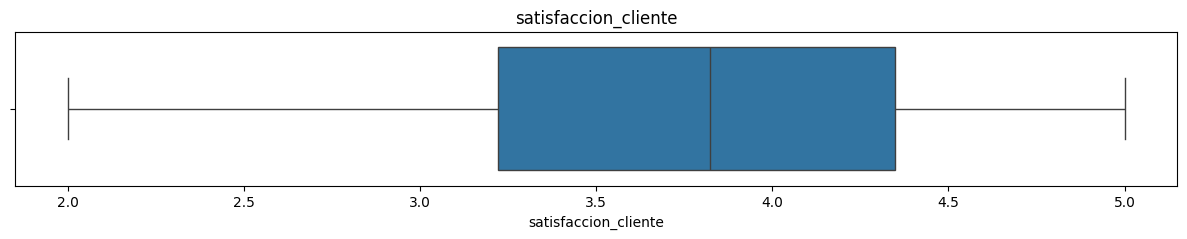


participacion_programa_lealtad Statistics:
count: 1833331.00, mean: 0.46, std: 0.50, min: 0.00, 25%: 0.00, 50%: 0.00, 75%: 1.00, max: 1.00


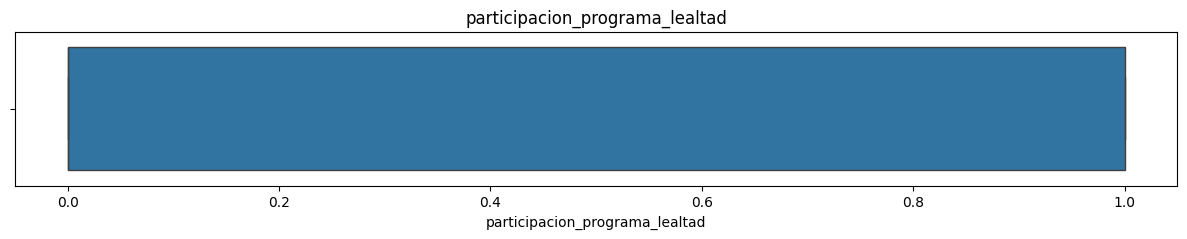

In [ ]:
for column in df_columns:
    plt.figure(figsize=(15,2))
    sns.boxplot(x=df[column])
    plt.title(column)
    stats = df[column].describe()
    stats_text = ", ".join([f"{key}: {value:.2f}" for key, value in stats.items()])
    print(f"\n{column} Statistics:\n{stats_text}")
    plt.show()

Con los diagramas de caja, se puede concluir que la base de clientes es predominantemente joven (mediana de 35 años) con ingresos moderados, aunque un pequeño grupo es hiperactivo y de alto gasto (outliers con hasta 49 compras y $29,999 en total). La satisfacción es generalmente buena (mediana de 3.82/5), aunque un 25% de los clientes están insatisfechos (con una satisfacción ≤3.22). El programa de lealtad solo capta al 46% de los clientes, y se observa un segmento inactivo, ya que el 25% de los clientes no realiza compras desde hace más de 164 días.

Realizamos un Scatter Plot para ver cómo se distribuyen los datos según la edad.

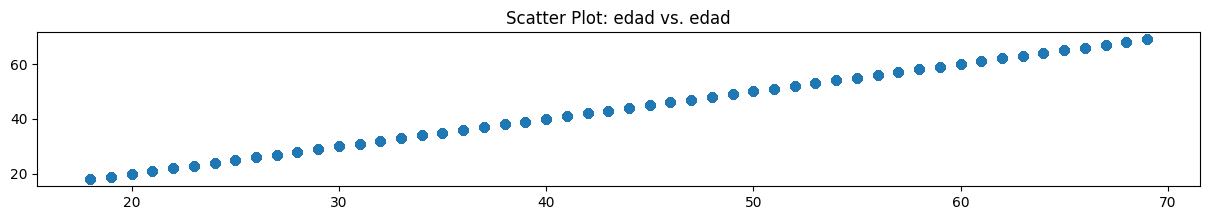

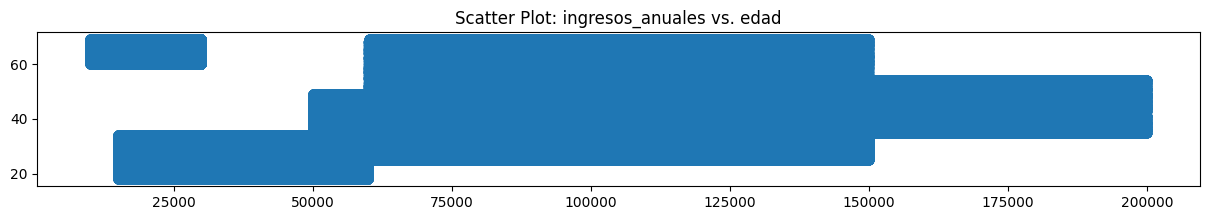

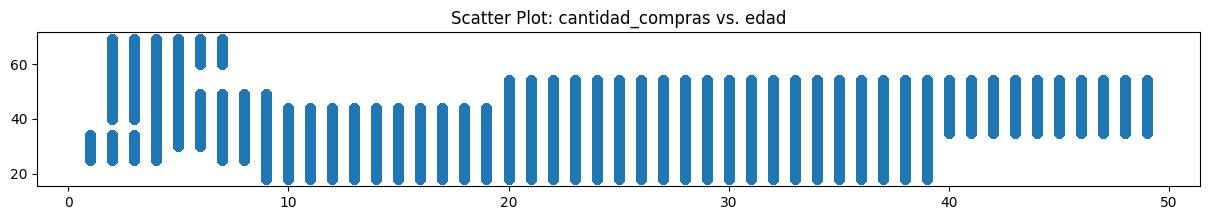

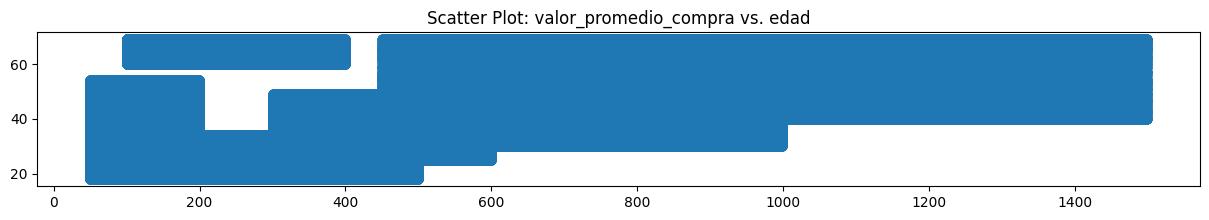

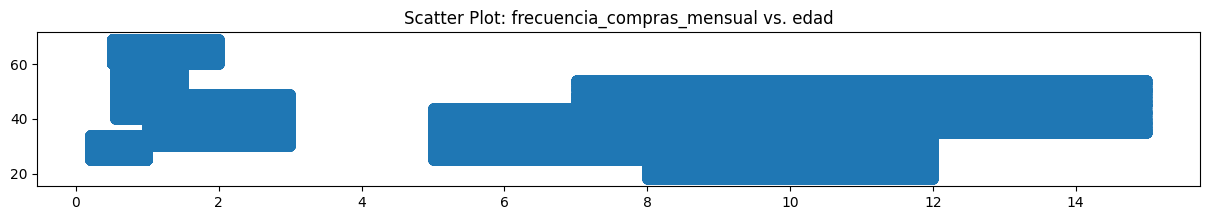

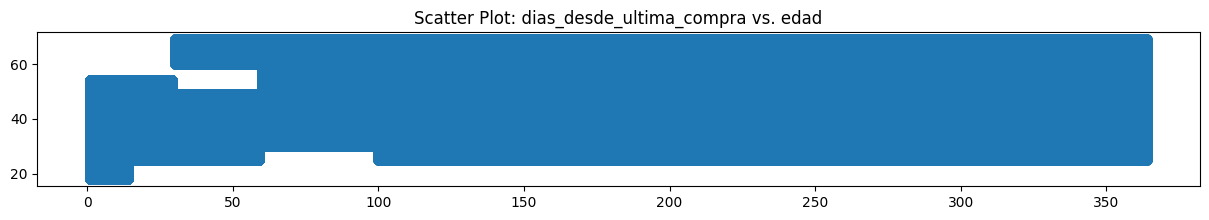

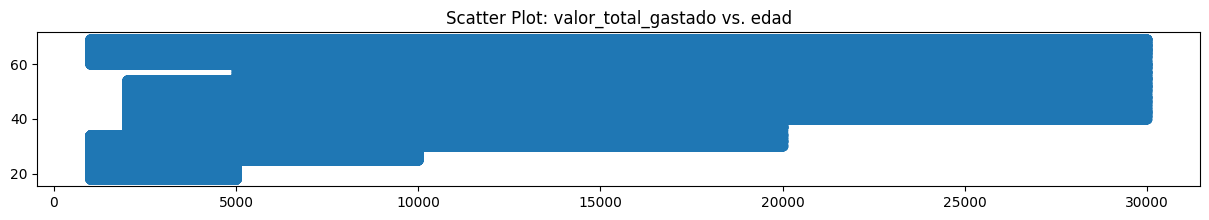

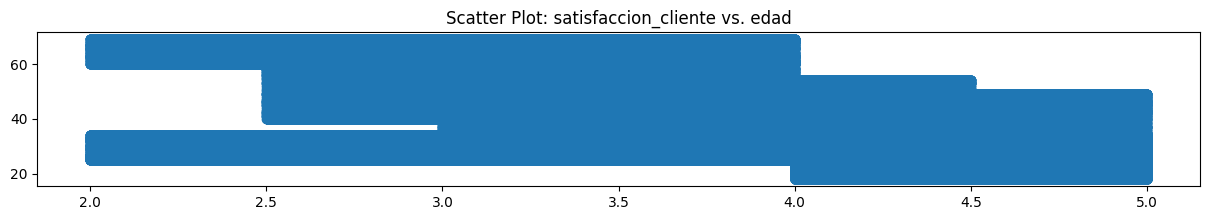

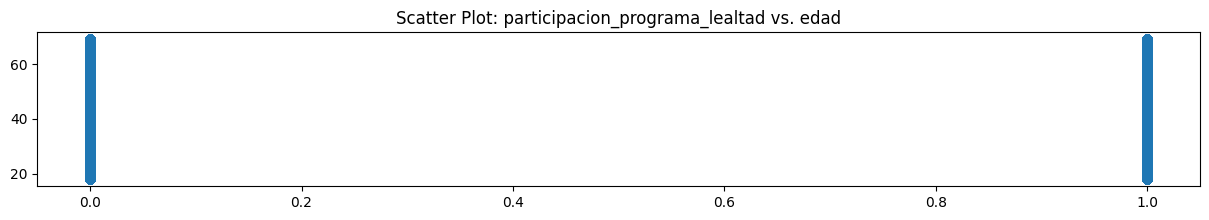

In [ ]:
for column in df_columns:
    plt.figure(figsize=(15,2))
    plt.scatter(numeric_df[column], numeric_df['edad'])
    plt.title(f'Scatter Plot: {column} vs. edad')
    plt.show()

El análisis de los datos revela que la edad influye en ciertos patrones de compra, aunque no es el único factor determinante. Se observa que los clientes más jóvenes y de mediana edad tienden a realizar compras con mayor frecuencia, mientras que el gasto total y el valor promedio de compra muestran una tendencia a aumentar con la edad. No obstante, es crucial reconocer la influencia de variables como los ingresos, el estilo de vida y las preferencias individuales, que también juegan un papel significativo en el comportamiento del consumidor. Por otro lado, la satisfacción del cliente se mantiene relativamente constante y alta, independientemente de la edad.

Por último, realizamos una visualización interactiva con los datos de los clientes en una matriz de dispersión personalizable.

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Análisis de datos de clientes usando scatter matrix'),
    dcc.Dropdown(
        id="dropdown",
        options=df_columns,
        value=['edad', 'ingresos_anuales'],
        multi=True
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"),
    Input("dropdown", "value"))
def update_bar_chart(dims):
    fig = px.scatter_matrix(
        df, dimensions=dims)
    return fig

app.run(debug=True)

<IPython.core.display.Javascript object>

El Análisis Exploratorio de Datos (EDA) permitió evaluar la calidad y estructura del conjunto de datos, identificando valores nulos, atípicos y distribuciones sesgadas en variables numéricas, así como desbalances en variables categóricas. Se encontraron correlaciones significativas entre algunas variables, lo que sugiere posibles redundancias. El análisis de clustering mostró la existencia de agrupaciones naturales, lo que respalda el uso de técnicas de segmentación. Además, se evidenció la necesidad de estandarizar variables numéricas y transformar variables categóricas antes del modelado.


-----

# Parte 2: K-means

Se realizará el modelo k-means para separar en grupos (clusters) a los clientes.

Importamos las librerías necesarias.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

Transformamos los datos numéricos a tipo float para optimizar el rendimiento del modelo.

In [ ]:
df = df.astype({col: 'float32' for col in df.select_dtypes(include=['number']).columns})

Se normalizan las columnas numéricas con StandardScaler para poder calcular mejor los pesos.

In [ ]:
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

Se convierten las variables categóricas a numéricas con OneHotEncoder.

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = ohe.fit_transform(df[categorical_cols])
categorical_df = pd.DataFrame(encoded_cats, columns=ohe.get_feature_names_out(categorical_cols))

Reemplazamos las variables categóricas en el DataFrame con sus versiones codificadas.

In [ ]:
df = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df, categorical_df], axis=1)

Dividimos el dataset en conjuntos de entrenamiento (Train) y prueba (Test) con el formato 80/20.

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {train_df.shape}")
print(f"Tamaño del conjunto de prueba: {test_df.shape}")

Tamaño del conjunto de entrenamiento: (1466664, 18)
Tamaño del conjunto de prueba: (366667, 18)


Utilizamos el método del codo para determinar cuántos clusters crear.

*Utilizamos MiniBatchKMean, ya que hay muchos datos, y MiniBatchKMeans lo que hace es, en lugar de usar todos los datos en cada iteración, tomar lotes de datos y realizar la iteración con ellos, haciendo el proceso más rápido y eficiente.*

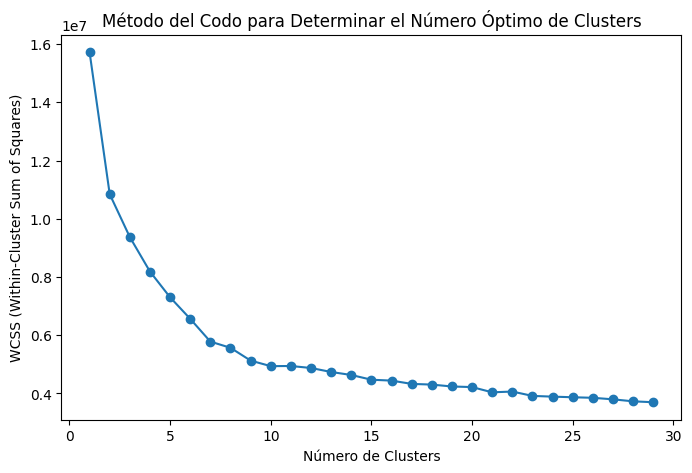

In [ ]:
wcss = []
k_range = range(1, 30)
for k in k_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=5, batch_size=50000)
    kmeans.fit(train_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()

Se decidió trabajar con 10 clusters, ya que a partir de este número la suma de los errores cuadrados desacelera su reducción. Por lo tanto, al elegir un valor mayor, no se evidenciaría un cambio significativo.

De igual forma, si se colocan más clusters, podría generarse overfitting, lo cual se esta evitando.

Se realiza MiniBatchKMeans con 10 clusters y un tamaño de 50,000 muestras por lote(50000 ya que hay muchos datos).

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=10, random_state=42, n_init=10, batch_size=50000)
df['Cluster'] = kmeans.fit_predict(df)

print("Clustering aplicado con éxito.")

Clustering aplicado con éxito.


Se generan las etiquetas para cada cluster según las características que tengan los promedios más altos.

In [ ]:
cluster_summary = df.groupby("Cluster").mean()

def assign_detailed_labels(summary):
    labels = {}
    used_labels = set()

    for cluster in summary.index:

        sorted_features = summary.loc[cluster].sort_values(ascending=False).index[:3]
        label = " - ".join(sorted_features)

        if label in used_labels:
            label = f"Segmento {cluster} - {label}"
        labels[cluster] = label
        used_labels.add(label)
    return labels

cluster_labels = assign_detailed_labels(cluster_summary)
df["Segmento"] = df["Cluster"].map(cluster_labels)

Vemos qué etiqueta fue asignada a cada cluster.

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df_unique = df.drop_duplicates(subset=['Cluster'])
display(df_unique)

,edad,ingresos_anuales,cantidad_compras,valor_promedio_compra,frecuencia_compras_mensual,dias_desde_ultima_compra,valor_total_gastado,satisfaccion_cliente,participacion_programa_lealtad,dispositivo_utilizado_móvil,dispositivo_utilizado_tablet,fuente_trafico_email,fuente_trafico_redes sociales,metodo_pago_tarjeta crédito,metodo_pago_transferencia,productos_adquiridos_computadoras,productos_adquiridos_electrodomésticos,productos_adquiridos_móviles,Cluster,Segmento
0,-0.793294,0.323741,-0.853467,-0.956326,-1.084620,1.252633,-0.592586,-1.142011,-0.929828,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,7,dias_desde_ultima_compra - ingresos_anuales - metodo_pago_tarjeta crédito
1,-0.277954,-0.459464,0.415400,-0.204696,-0.039432,-0.746208,0.198310,-0.432325,1.075468,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9,participacion_programa_lealtad - dispositivo_utilizado_móvil - fuente_trafico_redes sociales
2,-0.646054,-1.196531,2.107224,-0.561072,0.839362,-0.783745,-0.778423,0.375742,-0.929828,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,frecuencia_compras_mensual - satisfaccion_cliente - cantidad_compras
3,-0.277954,-0.346349,-0.515103,1.398997,-0.622752,-0.230075,0.154309,-0.404628,-0.929828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,dias_desde_ultima_compra - valor_total_gastado - valor_promedio_compra
6,0.605486,1.510349,1.853450,-0.907729,1.856070,-0.868203,0.075493,-0.095227,-0.929828,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,6,ingresos_anuales - cantidad_compras - frecuencia_compras_mensual
8,0.752726,0.899181,-0.768876,3.031848,-1.079884,0.511279,3.569813,0.322316,1.075468,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,8,valor_total_gastado - valor_promedio_compra - edad
11,-1.382254,-1.173903,-0.345920,-1.098876,0.837065,-0.774360,-0.758921,1.210737,1.075468,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,participacion_programa_lealtad - frecuencia_compras_mensual - satisfaccion_cliente
12,1.783406,-1.137043,-0.684285,-0.674465,-1.040701,0.239136,-0.739419,-2.302963,-0.929828,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,edad - metodo_pago_transferencia - fuente_trafico_email
16,0.311006,-0.162206,0.161627,-0.000590,0.570613,-0.511602,0.050994,-0.067561,-0.929828,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4,dispositivo_utilizado_móvil - fuente_trafico_redes sociales - metodo_pago_tarjeta crédito
68,0.458246,0.736353,-0.768876,1.139814,-1.093593,1.506007,0.274869,-0.772340,1.075468,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2,participacion_programa_lealtad - dias_desde_ultima_compra - valor_promedio_compra


Los clusters tendrian las siguientes  etiquetas:

*   Cluster 0: Clientes Premium de Baja Frecuencia
*   Cluster 1: Compradores Frecuentes y Fidelizados
*   Cluster 2: Clientes Inactivos con Historial Positivo
*   Cluster 3: Jóvenes Digitales con Preferencia por Transferencias
*   Cluster 4: Usuarios Móviles con Alto Impacto en Redes
*   Cluster 5: Compradores de Alta Frecuencia y Decisión Rápida
*   Cluster 6: Clientes de Alto Ingreso y Consumo Sostenido
*   Cluster 7: Clientes Potenciales de Alto Poder Adquisitivo
*   Cluster 8: Estrategas del Valor y la Rentabilidad
*   Cluster 9: Consumidores Digitales con Fuerte Lealtad



Visualizamos cómo quedan agregadas las etiquetas en una nueva columna del dataset.

In [ ]:
cluster_labels = {
    0: "Clientes Premium de Baja Frecuencia",
    1: "Compradores Frecuentes y Fidelizados",
    2: "Clientes Inactivos con Historial Positivo",
    3: "Jóvenes Digitales con Preferencia por Transferencias",
    4: "Usuarios Móviles con Alto Impacto en Redes",
    5: "Compradores de Alta Frecuencia y Decisión Rápida",
    6: "Clientes de Alto Ingreso y Consumo Sostenido",
    7: "Clientes Potenciales de Alto Poder Adquisitivo",
    8: "Estrategas del Valor y la Rentabilidad",
    9: "Consumidores Digitales con Fuerte Lealtad"
}

df["Etiqueta_Cluster"] = df["Cluster"].map(cluster_labels)

display(df[["Cluster", "Etiqueta_Cluster"]].drop_duplicates())

,Cluster,Etiqueta_Cluster
0,7,Clientes Potenciales de Alto Poder Adquisitivo
1,9,Consumidores Digitales con Fuerte Lealtad
2,5,Compradores de Alta Frecuencia y Decisión Rápida
3,0,Clientes Premium de Baja Frecuencia
6,6,Clientes de Alto Ingreso y Consumo Sostenido
8,8,Estrategas del Valor y la Rentabilidad
11,1,Compradores Frecuentes y Fidelizados
12,3,Jóvenes Digitales con Preferencia por Transferencias
16,4,Usuarios Móviles con Alto Impacto en Redes
68,2,Clientes Inactivos con Historial Positivo


Vemos cuántos datos hay por cluster.

Cluster
5    299726
9    207855
1    200065
8    172160
3    168183
0    167923
7    167460
6    166007
2    146335
4    137617
Name: count, dtype: int64


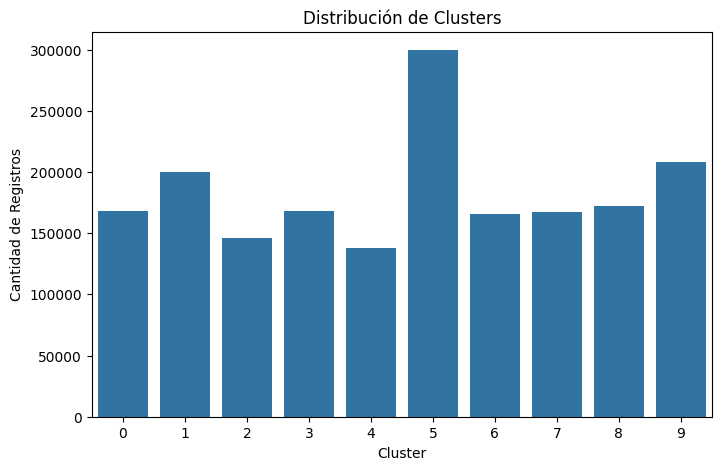

In [ ]:
print(df['Cluster'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Cluster'])
plt.xlabel('Cluster')
plt.ylabel('Cantidad de Registros')
plt.title('Distribución de Clusters')
plt.show()


El modelo K-Means se utilizó para segmentar a los clientes en distintos clusters según sus características. Se aplicó una estandarización de datos antes de la agrupación para mejorar el rendimiento del algoritmo. La elección del número óptimo de clusters se basó en el método del codo. Como resultado, se obtuvieron 10 grupos diferenciados que permiten identificar distintos tipos de clientes con patrones de compra y comportamiento específicos, evidenciando un mayor número de clientes ubicados en el grupo 5.

-----


# Parte 3: Árbol de Decisión

Ahora realizamos el Árbol de Decisión para poder determinar a qué cluster pertenece un dato aleatorio de nuestra base de datos de entrenamiento (train).

Instalamos las librerías necesarias.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score


De los DataFrames se separan las características (X_train, X_test) y las etiquetas (y_train, y_test) para entrenar el modelo.

In [ ]:
train_df['Cluster'] = df.loc[train_df.index, 'Cluster']
test_df['Cluster'] = df.loc[test_df.index, 'Cluster']

features = [col for col in train_df.columns if col != 'Cluster']

X_train = train_df[features]
y_train = train_df['Cluster']
X_test = test_df[features]
y_test = test_df['Cluster']

Se entrena el árbol de decisión.

In [ ]:

clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Visualizamos el árbol de decisión.

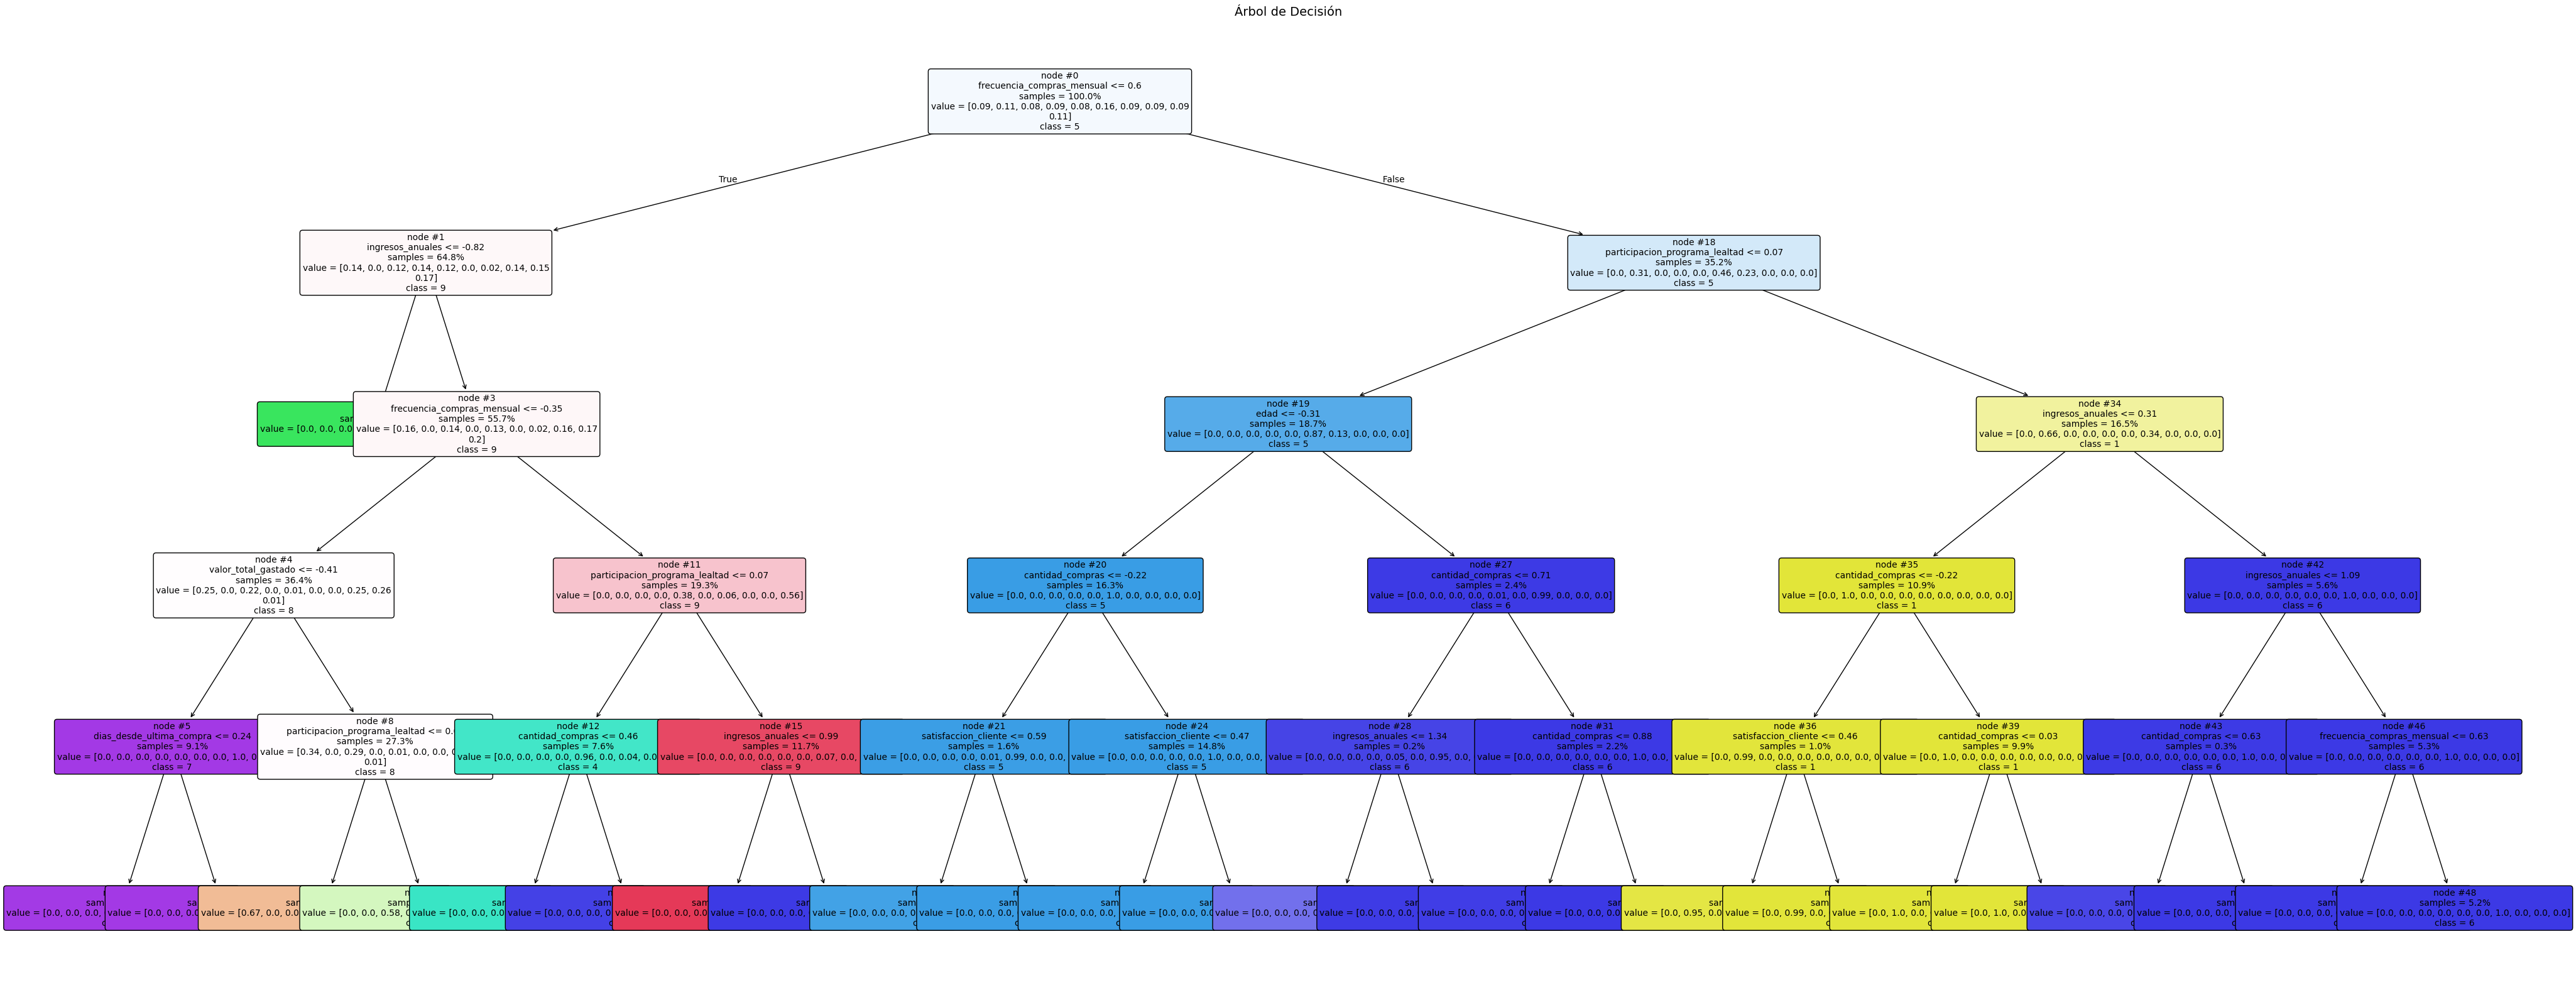

In [ ]:
plt.figure(figsize=(50, 20))
tree.plot_tree(clf,
               feature_names=X_train.columns,
               class_names=[str(i) for i in range(10)],
               filled=True,
               rounded=True,
               fontsize=10,
               proportion=True,
               impurity=False,
               node_ids=True,
               precision=2)

plt.title("Árbol de Decisión", fontsize=14)
plt.show()


Probamos nuestro árbol con los datos de entrenamiento (train).

In [ ]:
def predict_cluster(new_data_point):
    new_data_point_df = pd.DataFrame([new_data_point[X_train.columns]], columns=X_train.columns)
    predicted_cluster = clf.predict(new_data_point_df)[0]
    return predicted_cluster

random_index = np.random.randint(0, len(train_df))
train_df = df.loc[train_df.index]
sample_data = train_df.iloc[random_index, :][X_train.columns]

predicted_cluster = predict_cluster(sample_data)
actual_cluster = train_df.iloc[random_index]['Cluster']

df_clusters = df[['Cluster', 'Etiqueta_Cluster']].drop_duplicates()

predicted_label = df_clusters.loc[df_clusters["Cluster"] == predicted_cluster, "Etiqueta_Cluster"].values[0]
actual_label = df_clusters.loc[df_clusters["Cluster"] == actual_cluster, "Etiqueta_Cluster"].values[0]

print(f"Predicted Cluster: {predicted_cluster} - {predicted_label}")
print(f"Actual Cluster: {actual_cluster} - {actual_label}")

Predicted Cluster: 9 - Consumidores Digitales con Fuerte Lealtad
Actual Cluster: 9 - Consumidores Digitales con Fuerte Lealtad


En este caso, obtenemos que se predijo correctamente el dato obtenido del DataFrame de test, ya que el valor predicho es 9 y el valor correcto también es 9. Esto confirma que el modelo está funcionando correctamente al predecir el cluster al que pertenece un dato.

Probamos nuestro árbol con los datos de prueba (test).

In [ ]:
def predict_cluster(new_data_point):
    new_data_point_df = pd.DataFrame([new_data_point[X_train.columns]], columns=X_train.columns)
    predicted_cluster = clf.predict(new_data_point_df)[0]
    return predicted_cluster

random_index = np.random.randint(0, len(test_df))
sample_data = test_df.iloc[random_index, :].drop('Cluster', errors='ignore')

predicted_cluster = predict_cluster(sample_data)

predicted_label = df_clusters.loc[df_clusters["Cluster"] == predicted_cluster, "Etiqueta_Cluster"].values[0]

print(f"Random Data Point: Predicted Cluster {predicted_cluster} - {predicted_label}")


Random Data Point: Predicted Cluster 3 - Jóvenes Digitales con Preferencia por Transferencias


Se obtuvo en nuestra prueba de test que el dato al que se le realizó la predicción pertenece al cluster 3. Esto indica que el modelo es capaz de asignar correctamente el cluster correspondiente al dato de acuerdo con las características aprendidas durante el entrenamiento.

Se evalúa el rendimiento del modelo de árbol de decisión utilizando métricas de precisión y F1-score.

In [ ]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.8981610016718167
F1 Score: 0.8631661308016653


Podemos evidenciar que nuestro modelo cuenta con una precisión del 90% y un F1 score del 86%. Por lo tanto, nuestro modelo es muy bueno. De igual forma, es importante resaltar que se debe tener cuidado con el overfitting.

El Árbol de Decisión se implementó para predecir el cluster al que pertenece un cliente en función de sus características. Se dividieron los datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Los resultados indican que el modelo es capaz de clasificar correctamente a los clientes en sus respectivos clusters, con métricas de desempeño como precisión y F1-score utilizadas para evaluar su eficacia. Esto sugiere que el modelo puede ser útil para asignar nuevos clientes a los clusters previamente definidos.

-----


# Parte 4: Conclusión

El modelo de K-Means con 10 clusters ha demostrado ser efectivo para segmentar a los clientes, ya que la elección de este número de clusters optimiza la reducción de los errores cuadrados sin generar cambios significativos al aumentar el número de clusters. Además, el Árbol de Decisión ha mostrado un alto desempeño, con una precisión del 90% y un F1 score del 86%, lo que indica que es un modelo robusto para predecir el cluster al que pertenece un dato nuevo.

Sin embargo, es crucial mantener un enfoque vigilante respecto al overfitting, ya que un modelo demasiado complejo podría ajustarse demasiado a los datos de entrenamiento y perder capacidad de generalización. Por lo tanto, se deben seguir implementando técnicas de validación y optimización para garantizar la estabilidad y fiabilidad del modelo en nuevos conjuntos de datos.